### Import Requirements

In [1]:
import pandas as pd
import numpy as np
import gzip
import json
import re
import string
import nltk
import random

from sklearn.feature_extraction.text import TfidfVectorizer

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Data Exploration

In [6]:
# Load Office Product Amazon Reviews as pandasDF
'''
def parse(path):
    g = gzip.open(path, "rb")
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient="index")

data_path = "../Office_Products_5.json.gz"
df = getDF(data_path)

'''

In [2]:
df = pd.read_json(r"/Users/sambhu/Downloads/Office_Products_5.json",lines=True)

In [3]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"11 7, 2017",A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",1510012800,NaN,NaN
1,4,True,"03 7, 2017",A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},emankcin,Bought this used and it came in great conditio...,Good,1488844800,NaN,NaN
2,5,True,"06 25, 2016",APB6087F4J09J,0140503528,{'Format:': ' Board book'},Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,1466812800,NaN,NaN
3,5,True,"02 21, 2016",A2DHERRZIPFU7X,0140503528,{'Format:': ' Paperback'},Caitlyn Jacobson,I purchased this book for my first grade class...,Great for Math!,1456012800,NaN,NaN
4,5,False,"08 2, 2015",A2XCLJRGFANRC,0140503528,{'Format:': ' Hardcover'},E. Ervin,Having spent numerous years in an elementary s...,Love Corduroy,1438473600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
800352,5,True,"09 9, 2017",ACHG5QICJCS1F,B01HHLLLIO,{'Size:': ' 6 Rolls'},Anky,Delivered on time and is as expected.,5 stars,1504915200,NaN,NaN
800353,5,True,"06 2, 2017",A1YB5J8SF6QX3L,B01HHLLLIO,{'Size:': ' 6 Rolls'},DM,worked great.,good stuff,1496361600,NaN,NaN
800354,5,True,"04 29, 2017",A3N4O7L4HBYJX4,B01HHLLLIO,{'Size:': ' 6 Rolls'},Verdant Treasures,I used to score free UPS 4x6 labels. The blac...,Couldn't be happier with these labels,1493424000,NaN,NaN
800355,5,True,"02 21, 2017",A2DR3CXSWWLYXY,B01HHLLLIO,{'Size:': ' 6 Rolls'},C. F.,great,Five Stars,1487635200,NaN,NaN


This Dataset is an updated version of the Amazon review dataset released in 2014. As in the previous version, this dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs). In addition, this version provides the following features:

More reviews:
The total number of reviews is 233.1 million (142.8 million in 2014).
Newer reviews:
Current data includes reviews in the range May 1996 - Oct 2018.
Metadata:
We have added transaction metadata for each review shown on the review page. Such information includes:
Product information, e.g. color (white or black), size (large or small), package type (hardcover or electronics), etc.
Product images that are taken after the user received the product.
Added more detailed metadata of the product landing page. Such detailed information includes:
Bullet-point descriptions under product title.
Technical details table (attribute-value pairs).
Similar products table.
More categories:
Includes 5 new product categories.

Source: https://nijianmo.github.io/amazon/index.html#code

### Pre-processing

In [1]:
# preprocess reviewText here as well

In [3]:
# Plot the vector distribution (bar graph)

In [4]:
# more preprocessing
## distribution graph
## limitization, stemming (week2)
## LaMDA ()?

In [4]:
df.dtypes

overall            int64
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
image             object
dtype: object

In [5]:
df=df.drop(columns=['reviewTime','reviewerName','unixReviewTime','vote','image'])

In [6]:
df.dtypes

overall        int64
verified        bool
reviewerID    object
asin          object
style         object
reviewText    object
summary       object
dtype: object

In [7]:
reviews_per_user = df.groupby(["reviewerID"]).count()
print("Numbers of reviews by each user: \n", reviews_per_user["asin"])

Numbers of reviews by each user: 
 reviewerID
A0001528BGUBOEVR6T5U     5
A01003458IEUPS8LQ1QU     6
A0203183BAH3TR08FZGB     7
A0220159ZRNBTRKLG08H     5
A0228801ER3IBSLNOT5W    10
                        ..
AZZWWSMIDFU6S            5
AZZX23UGJGKTT           10
AZZYGB3DSML0J            9
AZZYW4YOE1B6E           12
AZZZ5UJWUVCYZ            5
Name: asin, Length: 101501, dtype: int64


In [8]:
reviews_per_product = df.groupby(["asin"]).count()
print("Numbers of reviews per products: \n", reviews_per_product["reviewerID"])

Numbers of reviews per products: 
 asin
0140503528    11
0310432065    15
0310520347    22
0310802636    19
0310806607    16
              ..
B01HH8E2QA    10
B01HHLLLIO     5
B01HI60F6C     5
B01HIL946E     5
B01HINS07G    55
Name: reviewerID, Length: 27965, dtype: int64


<AxesSubplot:>

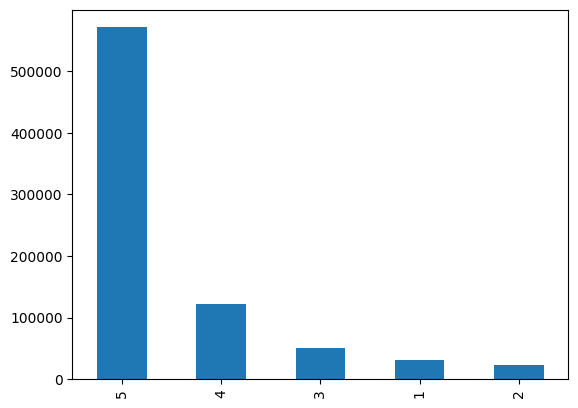

In [9]:
overall_counts=df['overall'].value_counts()
overall_counts.plot.bar()

In [14]:
positive = df[df['overall'] > 3]
negative = df[df['overall'] < 3]

In [15]:
positive = positive.dropna()
negative = negative.dropna()

In [17]:
positive

,overall,verified,reviewerID,asin,style,reviewText,summary
0,4,True,A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},kids like story BUT while i really wanted a bo...,"good story, small size book though"
1,4,True,A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},Bought this used and it came in great conditio...,Good
2,5,True,APB6087F4J09J,0140503528,{'Format:': ' Board book'},Every story and book about Corduroy is Fantast...,Best Books for All Children
3,5,True,A2DHERRZIPFU7X,0140503528,{'Format:': ' Paperback'},I purchased this book for my first grade class...,Great for Math!
4,5,False,A2XCLJRGFANRC,0140503528,{'Format:': ' Hardcover'},Having spent numerous years in an elementary s...,Love Corduroy
...,...,...,...,...,...,...,...
800352,5,True,ACHG5QICJCS1F,B01HHLLLIO,{'Size:': ' 6 Rolls'},Delivered on time and is as expected.,5 stars
800353,5,True,A1YB5J8SF6QX3L,B01HHLLLIO,{'Size:': ' 6 Rolls'},worked great.,good stuff
800354,5,True,A3N4O7L4HBYJX4,B01HHLLLIO,{'Size:': ' 6 Rolls'},I used to score free UPS 4x6 labels. The blac...,Couldn't be happier with these labels
800355,5,True,A2DR3CXSWWLYXY,B01HHLLLIO,{'Size:': ' 6 Rolls'},great,Five Stars


In [29]:
negative.head(20)

,overall,verified,reviewerID,asin,style,reviewText,summary
99,2,True,A3FN77M2238QY2,0310823706,{'Format:': ' Leather Bound'},"enormous, bulky, returned it",returned it
100,1,True,APJFBMED2VK0L,0310823706,{'Format:': ' Leather Bound'},The deminsions were on the 'outside' of the pr...,"The bible should be at least 2"" less around fo..."
133,1,True,AH03Q5EW4MIO0,0310821800,{'Format:': ' Misc. Supplies'},I did not find any leather in this Bible Cover...,"plastic, not leather"
137,2,True,A29P04AGK8WZ2O,0312385331,{'Format:': ' Paperback'},large an expensive. rent instead,Two Stars
161,1,True,A243Y8E053ZZD2,0439499887,{'Format:': ' Paperback'},flimsy. don't waste your money.,dont waste your money
191,1,True,A1SKC22OVNHY1P,0439499887,{'Format:': ' Paperback'},"Expected a story book, amd instead this is a t...",Disappointed that it's exactly the same as the...
285,2,True,A1N0KPRDV8M95,0439893577,{'Package Quantity:': ' 1'},"When we first got this easel, I really liked i...",I really liked it! It was so compact and easy ...
309,2,True,A2LIUAQ8881NYZ,0486256006,{'Format:': ' Paperback'},very small!,Two Stars
311,1,True,A2LOCNLCDMUKS0,0486256006,{'Format:': ' Paperback'},Not being able to easily tear out the pages is...,"Fine to complete a purchase, but that is as fa..."
312,2,True,AJ1QCT650MVSH,0486256006,{'Format:': ' Paperback'},Too small,Two Stars


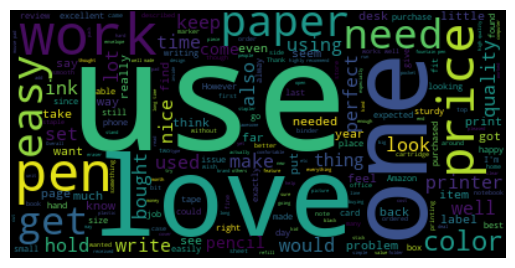

In [26]:
# comman words in positive review comments
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopwords = set(stopwords.words('english'))
stopwords.update(["br", "stuff", "href","taste", "product", "flavour","like", "coffee", "dog","flavor","buy"]) 

pos = " ".join(review for review in positive.reviewText)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

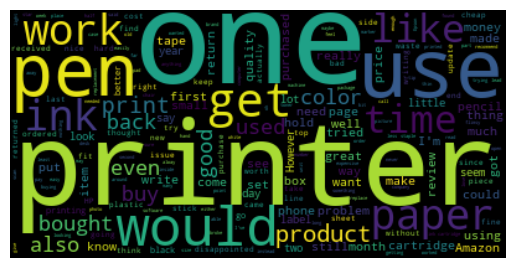

In [28]:
# comman words in negative review comments
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = set(stopwords.words('english'))
negreviews = " ".join(review for review in negative.reviewText)
wordcloud = WordCloud(stopwords=stopwords).generate(negreviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# a. Randomly select 500-1000 reviews from your dataset and perform steps b through d.
n_samples = random.randint(500, 1000)
review_samples = df.sample(n=n_samples)
review_samples

,overall,verified,reviewerID,asin,style,reviewText,summary
687266,5,True,AU5DB0X9NMNIJ,B0153I0418,NaN,very good product,Five Stars
161966,5,True,A13T6JFOV8SGNR,B000GAU2RU,"{'Size:': ' 0.9mm', 'Style:': ' 1 Pack'}",Attractive and writes nicely.,Five Stars
111224,2,True,A2SME0REZGR0IW,B0002HLI48,"{'Size:': ' 1-Pack', 'Style:': ' 8 Tabs'}",I think this product was O.K because I have a ...,Plastic dividers
292361,5,True,AWU1U3A4JOWVI,B0016LKWLO,{'Size:': ' 1 Pack'},I give this Aidata laptop sand five stars. I b...,The laptop stand I'd been looking for
551955,5,True,A14V8E2PSBVRRA,B00GTXWZN2,"{'Color:': ' (4) Black, (2) Cyan, (2) Magenta,...",I wish I would have purchased these much soone...,Love!!
...,...,...,...,...,...,...,...
756308,5,False,A1POL0R3RNLZ53,B000WE52HK,NaN,This is identical to the one included with Fab...,works
615794,5,True,A141A7NBD1DOCX,B00O6ELDLQ,{'Size:': ' 2 Pack (Gel Pens)'},Used at work with no issues. Didn't have anyon...,Super cool pens
262067,5,True,A6H386LTX2BS7,B000XKW45Q,"{'Size:': ' Pack of 25', 'Color:': ' Clear'}",Perfect for my needs.,Five Stars
72959,5,True,A2PWQDCMXTBV5U,B00006IF67,"{'Size:': ' 12 Rolls', 'Style:': ' No Dispenser'}",It's tape.,It's Tape.


In [11]:
#b. Label your data based on the value of “rating of the product” i.e. as follows:
    #i. Ratings 4,5: Positive
    #ii. Rating 3: Neutral
    #iii. Ratings 1,2: Negative

# Create new column
review_samples.insert(1, "sentiment", np.nan)
review_samples

,overall,sentiment,verified,reviewerID,asin,style,reviewText,summary
687266,5,NaN,True,AU5DB0X9NMNIJ,B0153I0418,NaN,very good product,Five Stars
161966,5,NaN,True,A13T6JFOV8SGNR,B000GAU2RU,"{'Size:': ' 0.9mm', 'Style:': ' 1 Pack'}",Attractive and writes nicely.,Five Stars
111224,2,NaN,True,A2SME0REZGR0IW,B0002HLI48,"{'Size:': ' 1-Pack', 'Style:': ' 8 Tabs'}",I think this product was O.K because I have a ...,Plastic dividers
292361,5,NaN,True,AWU1U3A4JOWVI,B0016LKWLO,{'Size:': ' 1 Pack'},I give this Aidata laptop sand five stars. I b...,The laptop stand I'd been looking for
551955,5,NaN,True,A14V8E2PSBVRRA,B00GTXWZN2,"{'Color:': ' (4) Black, (2) Cyan, (2) Magenta,...",I wish I would have purchased these much soone...,Love!!
...,...,...,...,...,...,...,...,...
756308,5,NaN,False,A1POL0R3RNLZ53,B000WE52HK,NaN,This is identical to the one included with Fab...,works
615794,5,NaN,True,A141A7NBD1DOCX,B00O6ELDLQ,{'Size:': ' 2 Pack (Gel Pens)'},Used at work with no issues. Didn't have anyon...,Super cool pens
262067,5,NaN,True,A6H386LTX2BS7,B000XKW45Q,"{'Size:': ' Pack of 25', 'Color:': ' Clear'}",Perfect for my needs.,Five Stars
72959,5,NaN,True,A2PWQDCMXTBV5U,B00006IF67,"{'Size:': ' 12 Rolls', 'Style:': ' No Dispenser'}",It's tape.,It's Tape.


In [12]:
# Label the sentimental values
for index, row in review_samples.iterrows():
    #i. Ratings 4,5: Positive
    if (row.overall >= 4.):
        print(index, "positive")
        review_samples.loc[index, ["sentiment"]] = "positive"
    #ii. Rating 3: Neutral
    elif (row.overall < 4. or row.overall > 2.):
        print(index, "neutral")
        review_samples.loc[index, ["sentiment"]] = "neutral"
    #iii. Ratings 1,2: Negative
    elif (row.overall <= 2.):
        print(index, "negative")
        review_samples.loc[index, ["sentiment"]] = "negative"

687266 positive
161966 positive
111224 neutral
292361 positive
551955 positive
504053 neutral
761076 positive
146524 positive
308608 positive
62202 positive
133023 positive
686348 positive
374168 positive
490446 positive
398253 positive
168215 positive
291752 positive
357962 positive
511162 positive
608708 positive
706896 positive
710160 positive
208016 positive
390886 neutral
272358 positive
628113 positive
83240 positive
291023 positive
713578 neutral
352746 positive
543185 positive
149153 positive
372473 positive
467513 positive
25160 positive
59646 positive
406590 positive
320297 positive
353586 positive
690110 positive
430030 neutral
198431 positive
707225 positive
192553 positive
83289 positive
380455 positive
515963 positive
217483 positive
105440 positive
745356 positive
222779 positive
684228 neutral
179026 positive
554849 positive
530061 positive
611175 positive
189790 positive
695515 positive
476206 positive
215426 positive
420349 neutral
618429 positive
714048 neutral
53796

706360 positive
29716 positive
596031 positive
255431 neutral
29589 positive
481298 neutral
418866 positive
404297 positive
658783 positive
346976 positive
319687 positive
623796 positive
182249 positive
516600 positive
648691 positive
417367 positive
359982 neutral
244152 positive
162496 positive
548797 neutral
200175 neutral
227079 positive
279783 positive
510076 positive
714154 positive
454288 positive
506484 positive
35494 positive
157793 positive
383488 positive
550953 positive
383043 positive
744032 positive
292084 positive
374815 positive
701265 neutral
414560 positive
591594 positive
43824 positive
263129 positive
127422 positive
62727 positive
90003 positive
226000 positive
239359 positive
695539 positive
770476 positive
273721 positive
561430 positive
219897 positive
331877 positive
98609 positive
454573 positive
506932 positive
205131 positive
545899 positive
714169 positive
685410 neutral
523150 neutral
760814 neutral
605864 positive
489325 positive
282306 positive
22505 po

In [65]:
review_samples["sentiment"].isnull().any()

False

In [68]:
review_samples["reviewText"].isnull().any()

False

In [13]:
review_samples

,overall,sentiment,verified,reviewerID,asin,style,reviewText,summary
687266,5,positive,True,AU5DB0X9NMNIJ,B0153I0418,NaN,very good product,Five Stars
161966,5,positive,True,A13T6JFOV8SGNR,B000GAU2RU,"{'Size:': ' 0.9mm', 'Style:': ' 1 Pack'}",Attractive and writes nicely.,Five Stars
111224,2,neutral,True,A2SME0REZGR0IW,B0002HLI48,"{'Size:': ' 1-Pack', 'Style:': ' 8 Tabs'}",I think this product was O.K because I have a ...,Plastic dividers
292361,5,positive,True,AWU1U3A4JOWVI,B0016LKWLO,{'Size:': ' 1 Pack'},I give this Aidata laptop sand five stars. I b...,The laptop stand I'd been looking for
551955,5,positive,True,A14V8E2PSBVRRA,B00GTXWZN2,"{'Color:': ' (4) Black, (2) Cyan, (2) Magenta,...",I wish I would have purchased these much soone...,Love!!
...,...,...,...,...,...,...,...,...
756308,5,positive,False,A1POL0R3RNLZ53,B000WE52HK,NaN,This is identical to the one included with Fab...,works
615794,5,positive,True,A141A7NBD1DOCX,B00O6ELDLQ,{'Size:': ' 2 Pack (Gel Pens)'},Used at work with no issues. Didn't have anyon...,Super cool pens
262067,5,positive,True,A6H386LTX2BS7,B000XKW45Q,"{'Size:': ' Pack of 25', 'Color:': ' Clear'}",Perfect for my needs.,Five Stars
72959,5,positive,True,A2PWQDCMXTBV5U,B00006IF67,"{'Size:': ' 12 Rolls', 'Style:': ' No Dispenser'}",It's tape.,It's Tape.


In [76]:
#c. Chose the appropriate columns for your sentiment analyzer. (Give this some thought)

### Text Representation

In [83]:
# Define methods to remove stopwords and punctuations from reviewText
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split("\W+", text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aiju2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# Apply TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(review_samples["reviewText"])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(542, 2618)
['', '03mm', '05', '05mm', '062pg', '07', '1', '10', '100', '1000', '1012', '10hour', '11', '114', '1162a', '11x14', '12', '127', '13', '14', '15', '150', '16', '18', '1982', '1year', '2', '20', '200', '2000', '2014', '2015', '23', '24', '25', '26', '2b', '3', '30', '300', '301', '307', '30odd', '30sec', '314', '32016', '3349a', '34', '35mm', '38', '388', '3m', '3ring', '4', '40', '48', '4999', '4pli', '4x12', '4x6', '4yo', '5', '50', '500', '53', '57', '5th', '6', '60', '61', '61xl', '62', '64bit', '6520', '682017', '6pack', '7', '701', '71', '74x', '75', '7inch', '7mm', '8', '80', '835', '845', '85x11', '8x10', '9', '90', '92', '93', '96', '9913', '9mm', 'abil', 'abl', 'absolut', 'absorbt', 'abysm', 'accept', 'acceptablebett', 'access', 'accid', 'accident', 'accommod', 'accordingli', 'acct', 'accur', 'ach', 'achiev', 'across', 'action', 'actual', 'ad', 'add', 'addit', 'address', 'adequ', 'adher', 'adhes', 'adivertis', 'adjac', 'adjust', 'adquat', 'adult', 'advanc', 'adver

### Modeling (Lexicon-based approach)

In [122]:
# Valence Aware Dictionary and Sentiment Reasoner (VADR)
VADR_analyzer = SentimentIntensityAnalyzer()
# Pass the analyzer for head 5 rows
for index, row in review_samples.head().iterrows():
    vs = VADR_analyzer.polarity_scores(row["reviewText"])
    print(
        f"Index: {index}\n"+
        f"Sentimental Analysis Result: {vs}\n"+
        f"Overall rating category: {row.sentiment}\n"+
        f"Full Text:\n{row.reviewText}\n"+
        "-"*50)

Index: 778312
Sentimental Analysis Result: {'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.3612}
Overall rating category: positive
Full Text:
They work like they are supposed to... I use them in my work as a teacher...
--------------------------------------------------
Index: 528188
Sentimental Analysis Result: {'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}
Overall rating category: positive
Full Text:
Great product!
--------------------------------------------------
Index: 88978
Sentimental Analysis Result: {'neg': 0.028, 'neu': 0.781, 'pos': 0.191, 'compound': 0.7814}
Overall rating category: positive
Full Text:
Hard to get excited over writing implements, but these are my personal favorite pens.  Can't speak for the pricing vs. local stores, but they showed up in one day and the convenience is worth a small upcharge.
--------------------------------------------------
Index: 602569
Sentimental Analysis Result: {'neg': 0.039, 'neu': 0.828, 'pos': 0.133, 'compound':

### Validation